# PA2: Random forests

Participants: 
    Alfred Karlsson
    Arvid Nyberg

## Task 1

### Step 1: Reading the data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Read the data from adult_test.csv and adult_train.csv
adult_test = pd.read_csv('adult_test.csv')
adult_train = pd.read_csv('adult_train.csv')

# Divide into X and y
X_test = adult_test.iloc[:, :-1]
X_train = adult_train.iloc[:, :-1]
Y_test = adult_test.iloc[:,-1]
Y_train = adult_train.iloc[:,-1]


### Step 2: Encoding the features as numbers with DictVectorizer

In [6]:
# Convert dataframe to dictionary 
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

# Encode the features as numbers i.e. one-hot encoding
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

# Training a classifier and printing accuracy score
clf = GradientBoostingClassifier()
clf.fit(X_train_encoded,Y_train)
print(clf.score(X_test_encoded, Y_test))

0.8711381364781033


### Step 3: Combining the steps with a pipeline

In [7]:
# Build a pipeline consisting of vectorization and a classifier
pipeline = make_pipeline(
    DictVectorizer(),
    GradientBoostingClassifier()
)

# Train the pipeline and print the accuracy score
pipeline.fit(X_train.to_dict('records'), Y_train)
print(pipeline.score(X_test.to_dict('records'), Y_test))

0.8711381364781033


## Task 2: decision trees and random forests

### Underfitting and overfitting in decision tree classifiers

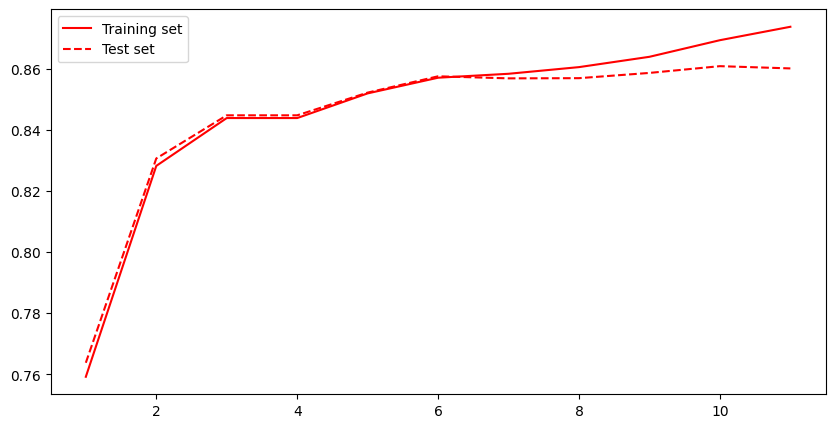

In [50]:
# Train a decision tree classifier and evaluate on both the training set and on the test set for different values of max_depth, ranging from 0 to 12
train_scores = []
test_scores = []
for max_depth in range(1, 12):
    rf_clf = DecisionTreeClassifier(max_depth=max_depth)
    rf_clf.fit(X_train_encoded,Y_train)
    train_scores.append((max_depth, rf_clf.score(X_train_encoded, Y_train)))
    test_scores.append((max_depth, rf_clf.score(X_test_encoded, Y_test)))

# Plot the the evaluation results for the training set and the test set in the same figure
plt.figure(figsize=(10, 5))
plt.plot(*zip(*train_scores), label='Training set', color='red')
plt.plot(*zip(*test_scores), label='Test set', color='red', linestyle='--')
plt.legend()
plt.show()

As seen in the resulting plot, overfitting begins at max depth 6.

### Underfitting and overfitting in random forest classifiers

In [49]:
# Generate the training and test set accuracy for different values of n_estimators and max_depth on random forest classifier

# This code cell will take a while to run

train_scores = []
test_scores = []

n_estimators_list = [1, 5, 10, 50, 100, 500]
max_depth_list = range(1, 12)

import time
for n_estimators in n_estimators_list:
    train_score_n = []
    test_score_n = []
    times = []
    for max_depth in max_depth_list:
        rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, n_jobs=-1, random_state=0)
        start_time = time.time()
        rf_clf.fit(X_train_encoded, Y_train)
        times.append(time.time() - start_time)
        train_score = rf_clf.score(X_train_encoded, Y_train)
        test_score = rf_clf.score(X_test_encoded, Y_test)
        train_score_n.append(train_score)
        test_score_n.append(test_score)
    avg_time = sum(times) / len(times)
    # Print the average time it takes to train the model for each value of n_estimators
    print("n_estimators = %d, avg_time = %f s" % (n_estimators, avg_time))
    train_scores.append(train_score_n)
    test_scores.append(test_score_n)


n_estimators = 1, avg_time = 0.061087
n_estimators = 5, avg_time = 0.092452
n_estimators = 10, avg_time = 0.131084
n_estimators = 50, avg_time = 0.425128
n_estimators = 100, avg_time = 0.815560
n_estimators = 500, avg_time = 4.373968


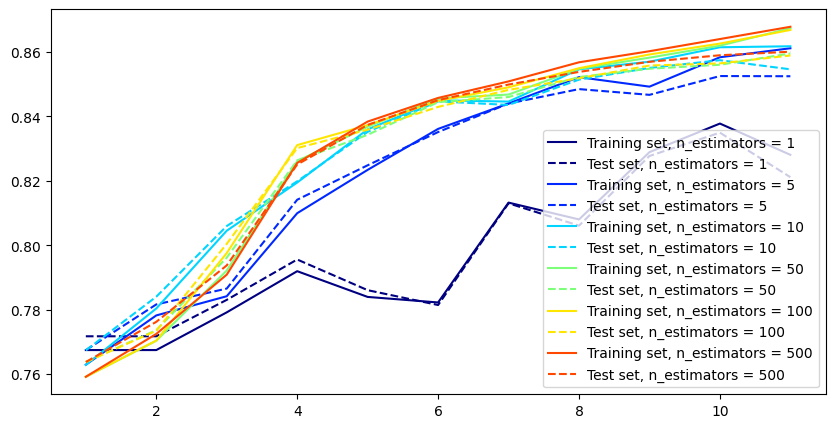

In [42]:
# Plot the results
plt.figure(figsize=(10, 5))
for i in range(len(n_estimators_list)):
    color = plt.cm.jet(i / len(n_estimators_list))
    plt.plot(max_depth_list, train_scores[i], label='Training set, n_estimators = {}'.format(n_estimators_list[i]), color=color)
    plt.plot(max_depth_list, test_scores[i], label='Test set, n_estimators = {}'.format(n_estimators_list[i]), color=color, linestyle='--')
plt.legend()
plt.show()

Q: What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

A: The random forest has greater variations in accuracy, because it only trains on a subset of the training data set each time. To make it train on the whole data set each time, you can set bootstrap to false.

Q: What happens with the curve for random forests as the ensemble size grows?

A: Less variations due to random random training subsets and less overfitting for higher tree depths.

Q: What happens with the best observed test set accuracy as the ensemble size grows?

A: It gets better

Q: What happens with the training time as the ensemble size grows?

A: It gets longer

## Task 3: Feature importances in random forest classifiers

In [54]:
feature_importances = zip(dv.feature_names_, rf_clf.feature_importances_)
# Sort the feature importances in descending order
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print the feature importances
for feature, importance in feature_importances:
    print(feature, importance)

marital-status=Married-civ-spouse 0.372602348010582
education-num 0.20475156826057944
capital-gain 0.18840815364088748
capital-loss 0.06812867013993783
age 0.05641079120632748
hours-per-week 0.03796697586074862
occupation=Exec-managerial 0.011457872355541293
occupation=Prof-specialty 0.006958658300237341
workclass=Self-emp-not-inc 0.006654467949423013
relationship=Wife 0.004984204921856612
workclass=Federal-gov 0.003241866303918898
occupation=Tech-support 0.002717119973155187
occupation=Sales 0.0022214776111694383
sex=Male 0.0022196872884020953
occupation=Other-service 0.002173457445380928
native-country=United-States 0.0018643591471086852
sex=Female 0.001847179617374013
occupation=Handlers-cleaners 0.001407747944962236
workclass=Local-gov 0.0013741941534964653
relationship=Not-in-family 0.0012564969141566824
workclass=State-gov 0.0011844353100918384
marital-status=Never-married 0.0010933831380657319
education=Masters 0.001002679504583521
workclass=Self-emp-inc 0.0009801815690855936
oc

The most important features are:
1. Wheter one is married or not
2. Education level
3. Capital gain
4. Capital loss
5. Age

"Income" is probably household income, which is the reason why marital status has such a high importance.
Educational level is expected to be tightly linked to income level.
We are not sure what is meant by capital gain and capital loss in this context.
Age is linked to an accumulated sallary increase and more work life experience, and thus, higher income.

One alternative way to compute importance of individual features is "permutation importance" i.e. permutating a column, caalculationg the importance metric for the permutated column, and comparing it to the original importance. That way, less (or no) bias is given to continuous or high-cardinality categorical features.